2.2.1 Orientation in Two Dimensions

2.2.1.1 2d Rotation Matrix

In [1]:
import RVC3 as rvc
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import math
from math import pi
np.set_printoptions(
    linewidth=120, formatter={
        'float': lambda x: f"{0:8.4g}" if abs(x) < 1e-10 else f"{x:8.4g}"})
np.random.seed(0)
from spatialmath import *
from spatialmath.base import *

SO2 rotation matrix, where angle is in radians

In [2]:
R = rot2(0.3)

the orientation represented by rotation matrix

<Axes: xlabel='X', ylabel='Y'>

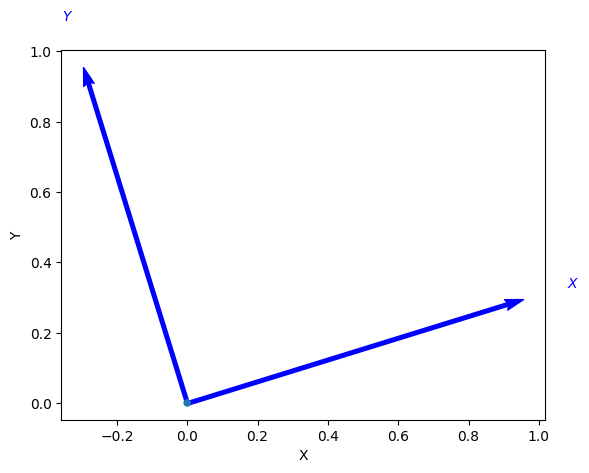

In [3]:
trplot2(R)

determinant property

In [4]:
np.linalg.det(R)

0.9999999999999999

product of 2 rotation matrices 

In [5]:
np.linalg.det(R @ R)

0.9999999999999998

using symbolic mathematics 

In [20]:
from sympy import Symbol, Matrix, simplify
theta = Symbol('theta')
R = Matrix(rot2(theta))
simplify(R * R)


Matrix([
[cos(2*theta), -sin(2*theta)],
[sin(2*theta),  cos(2*theta)]])

In [21]:
R.det()

sin(theta)**2 + cos(theta)**2

In [22]:
R.det().simplify()

1

2.2.1.2 Matrix Exponential for Rotation

In [23]:
R = rot2(0.3);

In [24]:
L = linalg.logm(R)

In [27]:
S = vex(L)

In [26]:
linalg.expm(L)

array([[  0.9553,  -0.2955],
       [  0.2955,   0.9553]])

In [28]:
linalg.expm(skew(S))

array([[  0.9553,  -0.2955],
       [  0.2955,   0.9553]])

In [33]:
X = skew(2)

In [31]:
vex(X)

array([       2])

2.2.2 Pose in Two Dimensions

2.2.2.1 2d Homoheneous Transformation Matrix


rotation of 0.3 rad


In [2]:
rot2(0.3)

array([[  0.9553,  -0.2955],
       [  0.2955,   0.9553]])

homogeneous transformation matrix for a rotation of 0.3 rad

In [9]:
trot2(0.3)


array([[  0.9553,  -0.2955,        0],
       [  0.2955,   0.9553,        0],
       [       0,        0,        1]])

compose 2 relative poses

creating a pose with translation of (1,2) and rotation of 30 degrees

In [16]:
TA = transl2(1, 2) @ trot2(30, "deg")

plot the coordinate frame representing pose

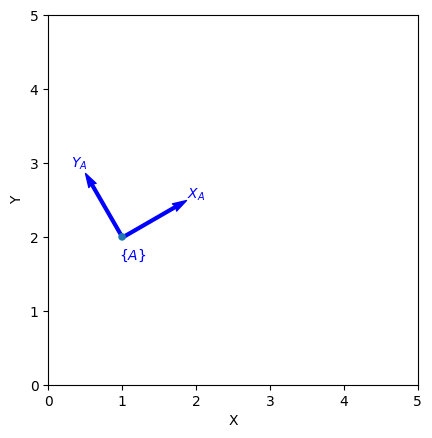

In [15]:
plotvol2([0, 5]);
trplot2(TA, frame="A", color="b");

creating another relative pose with displacement of (2, 1) and zero rotation

In [17]:
TB = transl2(2,1)

plot the coordinate frame representing pose


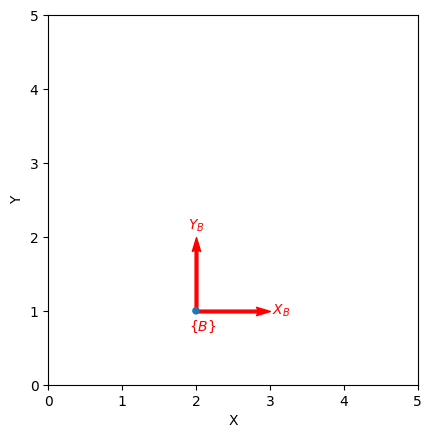

In [19]:
plotvol2([0, 5]);
trplot2(TB, frame="B", color="r");

compose the 2 relative poses


In [20]:
TAB = TA @ TB

plot the compose of 3 relative poses

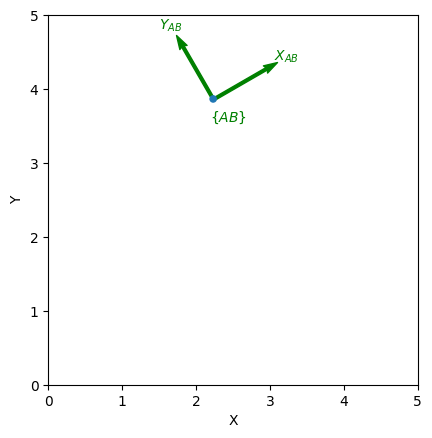

In [22]:
plotvol2([0, 5]);
trplot2(TAB, frame="AB", color="g");

In [23]:
TBA = TB @ TA

noncommutativity of composition

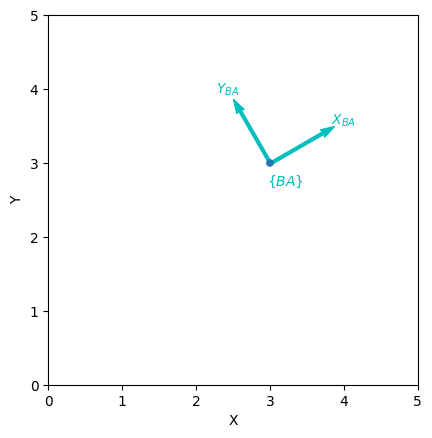

In [27]:
plotvol2([0, 5]);
trplot2(TBA, frame="BA", color="c");

define a point (3,2) relative to the world frame


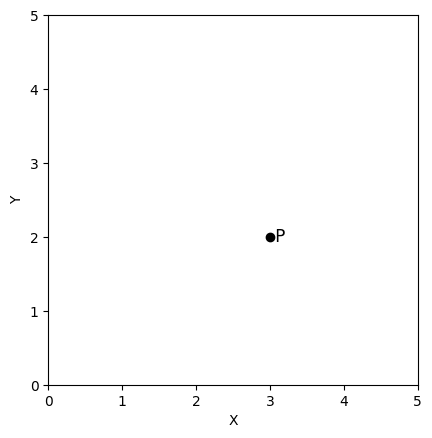

In [31]:
plotvol2([0, 5]);
P = np.array([3, 2]);
plot_point(P, "ko", text="P");

substituting numerical values and convert the euclidian point coordinates to homogeneous form


In [32]:
np.linalg.inv(TA) @ np.hstack([P, 1])

array([   1.732,       -1,        1])

converts homogeneus to euclidian coordinates

In [33]:
h2e(np.linalg.inv(TA) @ e2h(P))

array([[   1.732],
       [      -1]])

converts to coordinate vectors and homogeneous form

In [34]:
homtrans(np.linalg.inv(TA), P)

array([[   1.732],
       [      -1]])

2.2.2.2 Rotating a Coordinate Frame